# Reading data with Pandas


Author: Y. Staeva

The data used for this script can be found at:

Link: https://github.com/ine-rmotr-curriculum/RDP-Reading-Data-with-Python-and-Pandas

This script is focused on reading data from various sources using the Pandas API. The script is for educational purposes only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

### Read the data from a database

The first data source is a relational database, which holds information on company employees.

In [2]:
connection = sqlite3.connect('/content/drive/MyDrive/chinook.db')

In [3]:
company_data = pd.read_sql_query('SELECT * FROM employees', connection)

**Have a look at the data**

In [4]:
company_data.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


**What does the employee table contain?**

In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeId  8 non-null      int64  
 1   LastName    8 non-null      object 
 2   FirstName   8 non-null      object 
 3   Title       8 non-null      object 
 4   ReportsTo   7 non-null      float64
 5   BirthDate   8 non-null      object 
 6   HireDate    8 non-null      object 
 7   Address     8 non-null      object 
 8   City        8 non-null      object 
 9   State       8 non-null      object 
 10  Country     8 non-null      object 
 11  PostalCode  8 non-null      object 
 12  Phone       8 non-null      object 
 13  Fax         8 non-null      object 
 14  Email       8 non-null      object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+ KB


**How many records are there?**

In [6]:
company_data.shape

(8, 15)

**Are there missing values?**

In [7]:
company_data.isnull().sum()

EmployeeId    0
LastName      0
FirstName     0
Title         0
ReportsTo     1
BirthDate     0
HireDate      0
Address       0
City          0
State         0
Country       0
PostalCode    0
Phone         0
Fax           0
Email         0
dtype: int64

There is one missing value, which indicates that the General manager of the company does not report to any of the employees.

### Read data from JSON file

The second data source is a json file, which contains information on video games.

In [8]:
game_data = pd.read_json('/content/drive/MyDrive/games.json')

**Have a look at the data**

In [9]:
game_data.head()

,title,price,content_rating_img,release_date,provider,genre,image
0,Call of Duty®: WWII + Destiny 2 - Lote,"129,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Dic 21 2018,Activision Blizzard Int'l BV,Shooter,https://store.playstation.com/store/api/chihir...
1,God of War® Digital Deluxe Edition,"69,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Abr 20 2018,Sony Interactive Entertainment Europe,Acción,https://store.playstation.com/store/api/chihir...
2,Far Cry 5,"69,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Mar 27 2018,UBISOFT ENTERTAINMENT SA,Aventura,https://store.playstation.com/store/api/chihir...
3,Far Cry 5 Edición Deluxe,"79,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Mar 27 2018,UBISOFT ENTERTAINMENT SA,Aventura,https://store.playstation.com/store/api/chihir...
4,Far Cry 5 Edición Oro,"89,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Mar 27 2018,UBISOFT ENTERTAINMENT SA,Aventura,https://store.playstation.com/store/api/chihir...


**What does the file contain?**

In [10]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               193 non-null    object
 1   price               193 non-null    object
 2   content_rating_img  193 non-null    object
 3   release_date        193 non-null    object
 4   provider            193 non-null    object
 5   genre               189 non-null    object
 6   image               193 non-null    object
dtypes: object(7)
memory usage: 10.7+ KB


There are 192 games, which are characterized by 7 parameters.

**Are there any missing values?**

In [11]:
game_data.isnull().sum()

title                 0
price                 0
content_rating_img    0
release_date          0
provider              0
genre                 4
image                 0
dtype: int64

**What values are missing?**

In [12]:
game_data['genre'].unique()

array(['Shooter', 'Acción', 'Aventura', None, 'Simulador',
       'Juegos de rol', 'Grupo', 'Carreras', 'Puzzle', 'Deportes',
       'Lucha', 'Casual', 'Horror', 'Japonés', 'Estrategia',
       'MUSIC/RHYTHM', 'Único', 'Arcade', 'Inglés', 'Árabe', 'Familia',
       'Alemán'], dtype=object)

There are 4 games in the dataset, that are not labelled with genre.

**Which are the games with no genre?**

In [13]:
mistery_games = game_data[game_data['genre'].isnull()]

In [14]:
mistery_games.head()

,title,price,content_rating_img,release_date,provider,genre,image
6,MLB® The Show™ 18,"49,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Mar 23 2018,Sony Interactive Entertainment,None,https://store.playstation.com/store/api/chihir...
7,MLB® The Show™ 18 Digital Deluxe Edition,"79,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Mar 23 2018,Sony Interactive Entertainment,None,https://store.playstation.com/store/api/chihir...
8,MLB® The Show™ 18 MVP Edition,"54,99 €",https://cdn-a.sonyentertainmentnetwork.com/grc...,Mar 23 2018,Sony Interactive Entertainment,None,https://store.playstation.com/store/api/chihir...
168,The Walking Dead Collection - The Telltale Ser...,,https://cdn-a.sonyentertainmentnetwork.com/grc...,Dic 5 2017,Telltale Games,None,https://store.playstation.com/store/api/chihir...


### Reading data from HTML file

The third source is the wikipedia web page on Disney Channel movies. The web page contains multiple tables. The second one is saved in the dataframe disney_channel_movies.

In [15]:
html_url = "https://en.wikipedia.org/wiki/List_of_Disney_Channel_original_films"

In [16]:
movie_list = pd.read_html(html_url)

**Have a look at the data**

In [17]:
 disney_channel_movies = movie_list[1]

In [18]:
disney_channel_movies.head()

,Year,Film,Premiere date,Ratings(millions),Ref(s)
0,1997,Under Wraps,"October 25, 1997",NaN,[12]
1,1998,You Lucky Dog,"June 27, 1998",NaN,NaN
2,1998,Brink!,"August 29, 1998",NaN,NaN
3,1998,Halloweentown,"October 17, 1998",3.4,[12][13]
4,1999,Zenon: Girl of the 21st Century,"January 23, 1999",NaN,[12]


**What is the movie information?**

In [19]:
disney_channel_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               112 non-null    int64  
 1   Film               112 non-null    object 
 2   Premiere date      112 non-null    object 
 3   Ratings(millions)  72 non-null     float64
 4   Ref(s)             74 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.5+ KB


**How many movies are in the list?**

In [20]:
disney_channel_movies.shape

(112, 5)

**Which movies were released in 2006?**

In [21]:
new_movies = disney_channel_movies[disney_channel_movies['Year'] == 2006]

In [22]:
new_movies.head()

,Year,Film,Premiere date,Ratings(millions),Ref(s)
60,2006,High School Musical,"January 20, 2006",7.7,[35][36]
61,2006,Cow Belles,"March 24, 2006",5.8,[37]
62,2006,Wendy Wu: Homecoming Warrior,"June 16, 2006",5.7,[37]
63,2006,Read It and Weep,"July 21, 2006",5.6,[37]
64,2006,The Cheetah Girls 2,"August 25, 2006",7.8,[38][21][22]


### Reading data from a spreadsheet file with multiple sheets

The last data source is an excel file with multiple sheets, which contains information on playstore applications.

In [23]:
playstore_data = pd.read_excel('/content/drive/MyDrive/playstore.xlsx')

**Have a look at the data**

In [24]:
playstore_data.head()

,Unnamed: 0,App,Category,Rating,Installs,Type,Price,Content_ID,Genres,Last_Updated
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,"10,000+",Free,0,101,Art & Design,"January 7, 2018"
1,1,Coloring book moana,ART_AND_DESIGN,3.9,"500,000+",Free,0,101,Art & Design;Pretend Play,"January 15, 2018"
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,"5,000,000+",Free,0,101,Art & Design,"August 1, 2018"
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,"50,000,000+",Free,0,102,Art & Design,"June 8, 2018"
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,"100,000+",Free,0,101,Art & Design;Creativity,"June 20, 2018"


**What type of data is in the dataset?**

In [25]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    250 non-null    int64  
 1   App           250 non-null    object 
 2   Category      250 non-null    object 
 3   Rating        239 non-null    float64
 4   Installs      250 non-null    object 
 5   Type          250 non-null    object 
 6   Price         250 non-null    object 
 7   Content_ID    250 non-null    int64  
 8   Genres        250 non-null    object 
 9   Last_Updated  250 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


**Are there any missing data values?**

In [26]:
playstore_data.isnull().sum()

Unnamed: 0       0
App              0
Category         0
Rating          11
Installs         0
Type             0
Price            0
Content_ID       0
Genres           0
Last_Updated     0
dtype: int64

**Check which games have missing rating values**

In [27]:
missing_rating = playstore_data[playstore_data['Rating'].isnull()]

In [28]:
missing_rating.head()

,Unnamed: 0,App,Category,Rating,Installs,Type,Price,Content_ID,Genres,Last_Updated
23,23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,"100,000+",Free,0,101,Art & Design;Action & Adventure,"March 7, 2018"
113,113,Wrinkles and rejuvenation,BEAUTY,NaN,"100,000+",Free,0,103,Beauty,"September 20, 2017"
123,123,Manicure - nail design,BEAUTY,NaN,"50,000+",Free,0,101,Beauty,"July 23, 2018"
126,126,Skin Care and Natural Beauty,BEAUTY,NaN,"100,000+",Free,0,102,Beauty,"July 17, 2018"
129,129,"Secrets of beauty, youth and health",BEAUTY,NaN,"10,000+",Free,0,104,Beauty,"August 8, 2017"


**Drop the games with missing rating values**

In [29]:
playstore_data = playstore_data.dropna(axis = 0, how='any')

**Check how many records are left**

In [30]:
playstore_data.shape

(239, 10)

**See the descriptive statistics of the data**

In [31]:
playstore_data.describe()

,Unnamed: 0,Rating,Content_ID
count,239.00000,239.000000,239.000000
mean,123.81590,4.311297,101.125523
std,73.12479,0.334309,0.468478
min,0.00000,3.100000,101.000000
25%,60.50000,4.100000,101.000000
50%,121.00000,4.400000,101.000000
75%,188.50000,4.600000,101.000000
max,249.00000,4.900000,104.000000


**Create a Box plot to visualize the game rating**

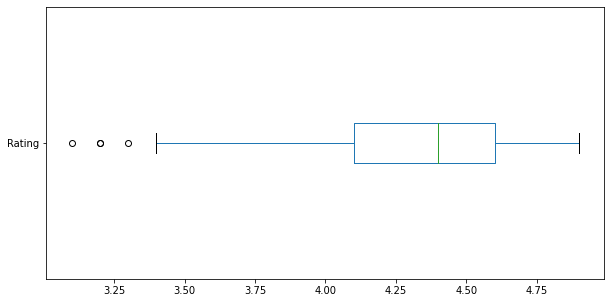

In [32]:
playstore_data['Rating'].plot(kind='box', vert=False, figsize=(10,5))

**Plot the density of the game rating, as well as the mean and median value**

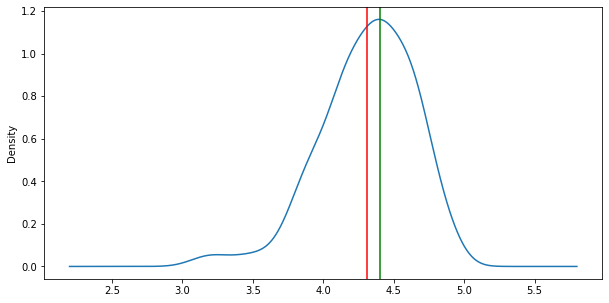

In [33]:
density = playstore_data['Rating'].plot(kind='density', figsize=(10,5))
density.axvline(playstore_data['Rating'].mean(), color='red')
density.axvline(playstore_data['Rating'].median(), color='green')

**Create a histogram to describe the Number of games in accordance to their rating.**

Text(0, 0.5, 'Number of Games')

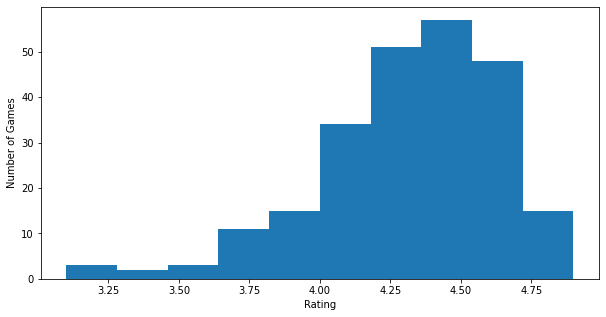

In [34]:
hist = playstore_data['Rating'].plot(kind='hist', figsize=(10,5))
hist.set_xlabel('Rating')
hist.set_ylabel('Number of Games')

**Check how many game categories are there**

In [35]:
playstore_data['Category'].value_counts()

BUSINESS               62
AUTO_AND_VEHICLES      49
ART_AND_DESIGN         48
BOOKS_AND_REFERENCE    45
BEAUTY                 35
Name: Category, dtype: int64

**Plot the proportion of games in each category**

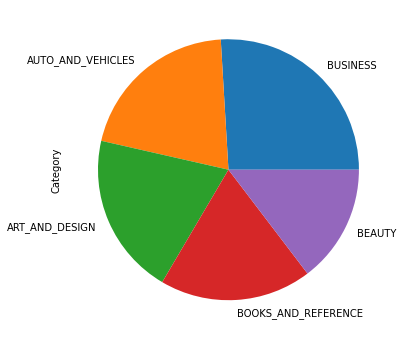

In [36]:
playstore_data['Category'].value_counts().plot(kind='pie', figsize=(6,6))